In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci

In [3]:
def line(x, m):
    return m

def poly(r ,a0,a1,a2,a3,a4,a5):
    return a0 + a1 * r + a2 * r**2 + a3 * r**3 + a4 * r**4 + a5 * r**5 

In [7]:
temps = [35,40,50,60,70,80,100,200,300]
pops = [[],[]]
for temp in temps:
    if temp < 200:
        numbs = np.arange(1,11)
    else:
        numbs = np.arange(1,6)
    pre_t = []
    pre_r = []
    for i in numbs:
        data = pd.read_csv("C:/Users/vasob/OneDrive/Documents/GitHub/fp/FP/F03/"+ str(temp) + "K/" + str(temp) + "K_" + str(i) + ".dat", delim_whitespace=True, skiprows=4)
        data = data.values.tolist()
        for dat in data:
            if dat[0] < 0:
                pre_t.append(dat[0])
                pre_r.append(dat[1])
    popt, conv = sci.curve_fit(line, pre_t, pre_r)
    pops[0].append(temp)
    pops[1].append(popt[0])
pops[0][8] = 295
print(pops)

[[35, 40, 50, 60, 70, 80, 100, 200, 295], [188.18743846153845, 175.87946028169014, 157.2471215500945, 142.61421275964392, 129.68592652370202, 120.3824673585325, 106.74970116550116, 68.81719490787269, 53.11385439388295]]


[1258.5376423872738, -3150.1699751047763, 3155.0331767760663, -1576.5297416780966, 392.9036254233017, -39.07820667200043]


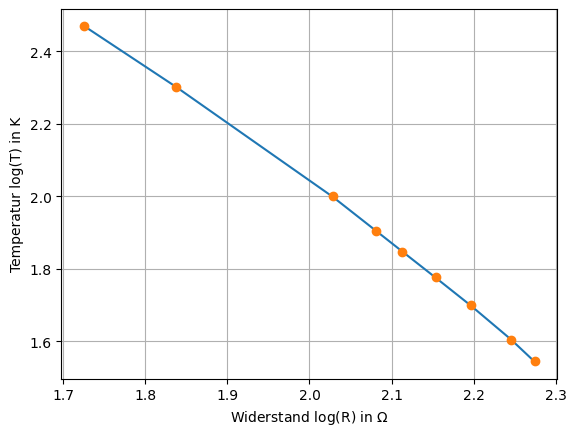

In [17]:
T = pops[0]
r = pops[1]

T = np.log10(T)
r = np.log10(r)

popt, conv = sci.curve_fit(poly, r, T)
plt.plot(r, poly(r, *popt))
print(popt.tolist())
plt.plot(r,T, linestyle = "", marker = "o")

plt.xlabel("Widerstand log(R) in $/Omega$")
plt.ylabel("Temperatur log(T) in K")
plt.grid()

In [14]:
i = 0
fehler = []
for t in pops[0]:
    fehler.append((t-poly(r[i], *popt))/t)
    i += 1
print(fehler)

[0.9559249900579614, 0.9598704090970841, 0.9660389900892187, 0.9704279018860196, 0.9736045538521142, 0.9761838542926398, 0.98001841209953, 0.9884940963061899, 0.9916278252668242]
